In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import numpy as np
from utils import *
from matplotlib import pyplot as plt
from roboflow import Roboflow
from segment_anything import SamPredictor, sam_model_registry
from helper_code.pipeline import run_pipeline
import os

In [2]:
rf = Roboflow(ROBOFLOW_API_KEY)
project = rf.workspace().project("final_annotation_classification")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [4]:
min_samples = 200

In [5]:
import numpy as np
import boto3
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
image_name = '../plot_images/13.png'

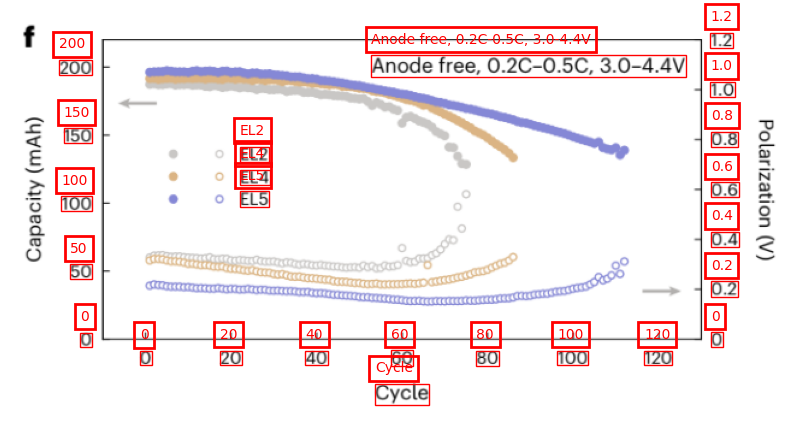

In [7]:
# Initialize the Textract client
textract = boto3.client('textract')

# Load the image file
with open(image_name, 'rb') as document:
    img_test = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': img_test})

# Process Textract response to match desired output format
ocr_results = []
for item in response['Blocks']:
    if item['BlockType'] == 'LINE' and 'Confidence' in item and item['Confidence'] > 50:  # Adjust confidence as needed
        text = item['Text']
        # Extract bounding box coordinates scaled to image dimensions
        width, height = Image.open(image_name).size
        box = item['Geometry']['BoundingBox']
        x = box['Left'] * width
        y = box['Top'] * height
        w = box['Width'] * width
        h = box['Height'] * height
        box = [[x, y], [x + w, y], [x + w, y + h], [x, y + h]]
        ocr_results.append((text, box))

# Visualization (assuming you want to visualize the results similarly)
img = cv2.imread(image_name)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

for text, box in ocr_results:
    # Extract the bounding box coordinates
    start_point = box[0]
    end_point = box[2]
    box_width = end_point[0] - start_point[0]
    box_height = end_point[1] - start_point[1]
    
    # Create a Rectangle patch
    rect = patches.Rectangle(start_point, box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the rectangle to the Axes
    ax.add_patch(rect)
    
    # Annotate the image with the OCR'ed text
    ax.text(start_point[0], start_point[1] - 10, text, bbox=dict(fill=False, edgecolor='red', linewidth=2), color='red')

plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


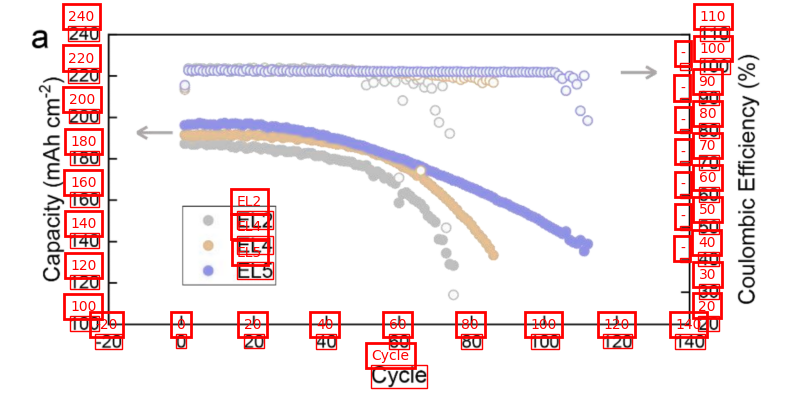

Y MIN 100
Y MAX 240
SEMANTIC Y MIN 100.0
SEMANTIC Y MAX 240.0
Y
OCR DIFF -519.5225781053305
SEM DIFF 140.0
OCR RATIO -3.7108755578952177
PIXEL DIFF -2.300386890769005
REAL DIFF FROM BASE POINT 0.619904077859665
Y_MIN 99.38009592214034
Y_MAX 239.77822888877301
SEMANTIC X MIN -20.0
SEMANTIC X MAX 140.0
X
OCR DIFF 1043.5642710700631
SEM DIFF 160.0
OCR RATIO 0.15332069565388357
PIXEL DIFF 1.061048749834299
REAL DIFF FROM BASE POINT 0.1626807324472782
X_MIN -20.162680732447278
X_MAX 139.90412553020715
X
Predicted [-20.162680732447278, 139.90412553020715]
Chat GPT [-20, 140]
Y
Predicted [99.38009592214034, 239.77822888877301]
Chat GPT [100, 240]


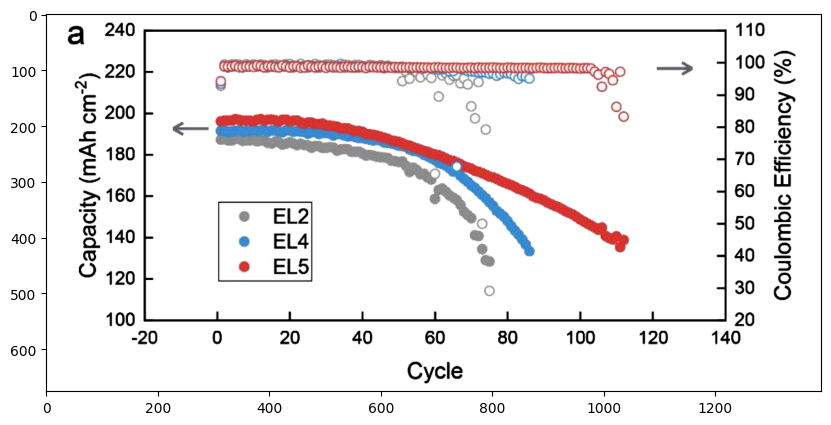

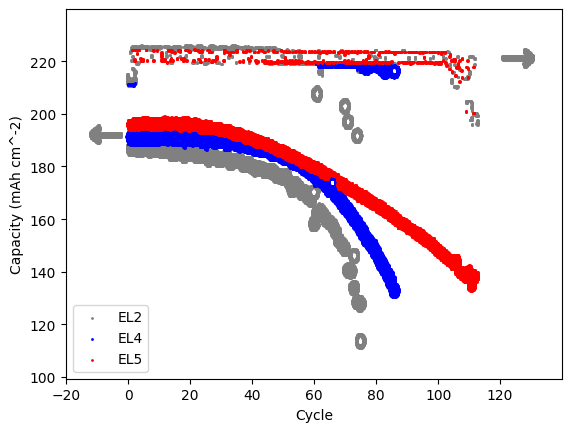

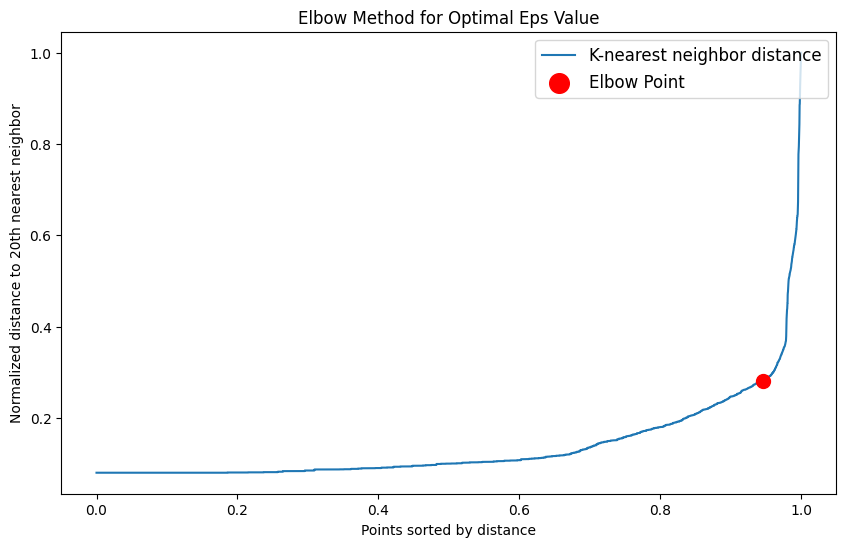

Number of clusters: 7
Number of outliers: 398
Silhouette_score: 0.22043182367864322


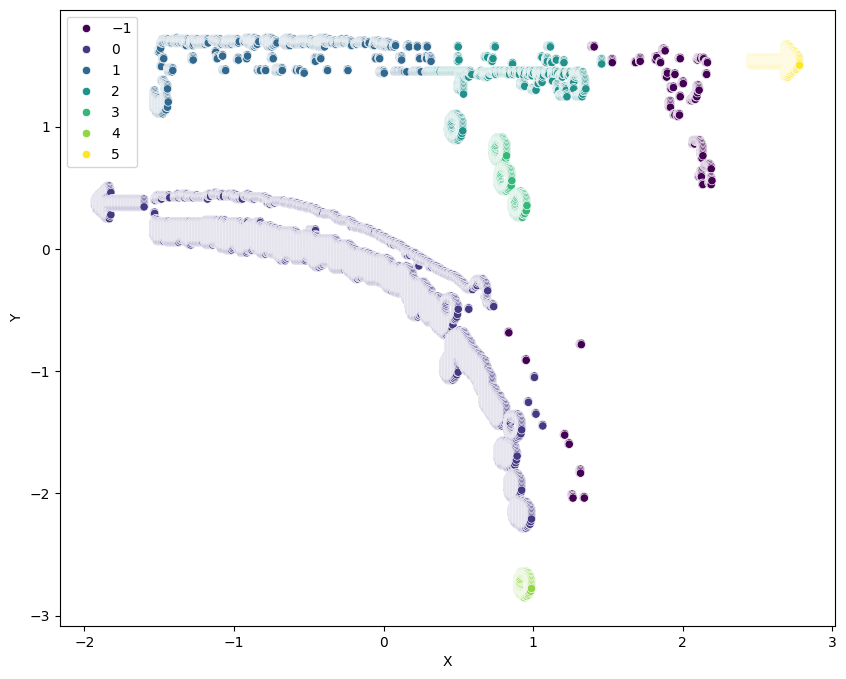

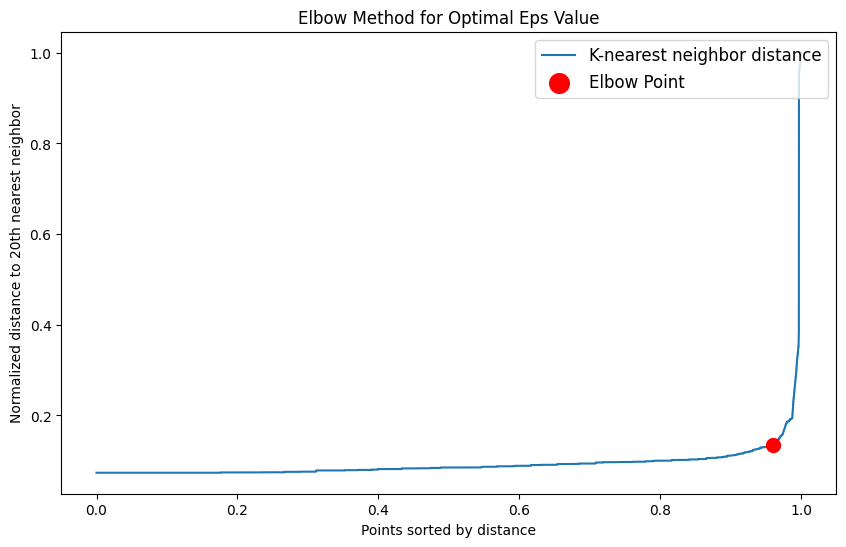

Number of clusters: 3
Number of outliers: 227
Silhouette_score: 0.35945070810805024


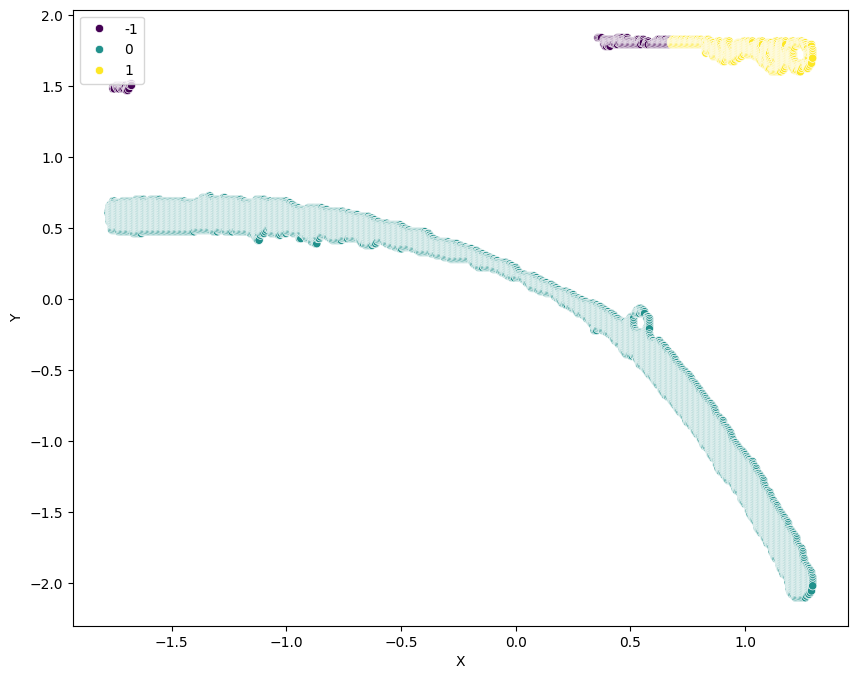

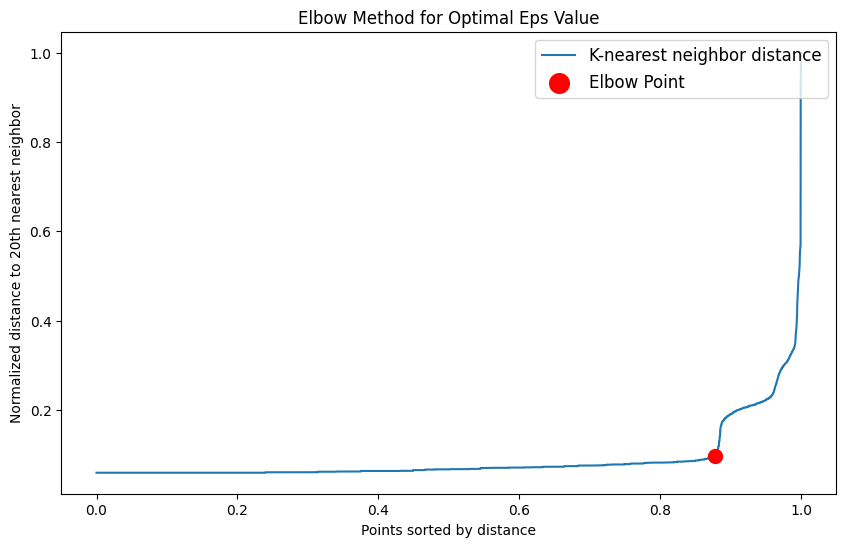

Number of clusters: 2
Number of outliers: 1713
Silhouette_score: 0.3560056570364864
HERE [19.63603738256912, 109.81497071084453]
PLOTTING
[0 0 0 ... 5 5 5]
#b22222
#483d8b
#556b2f
#228b22
#9400d3
#8b4513
#8b4513
[0 0 0 ... 0 0 0]
#8b4513
#00008b
#4b0082
[0 0 0 ... 0 0 0]
#8a2be2
#6b8e23


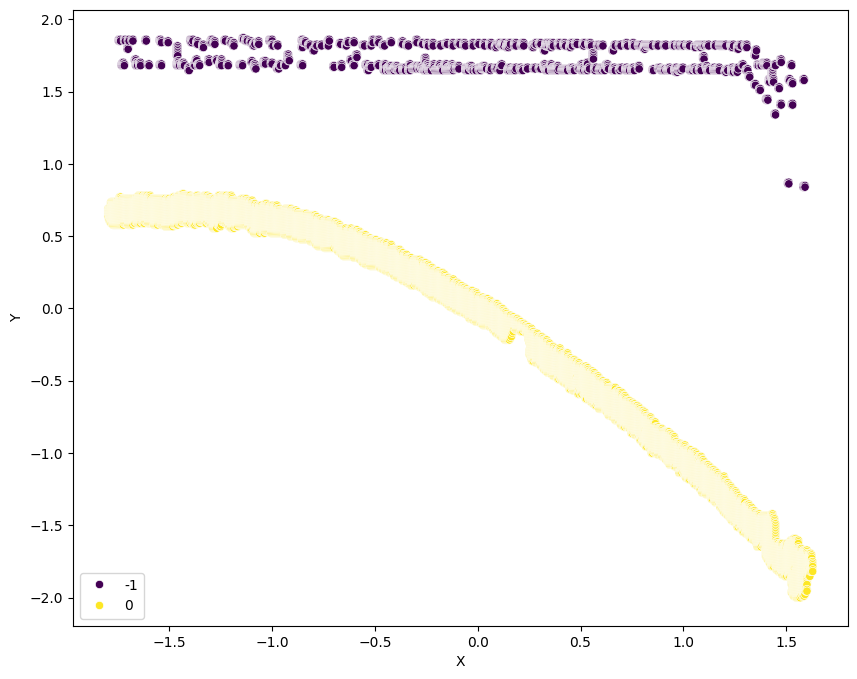

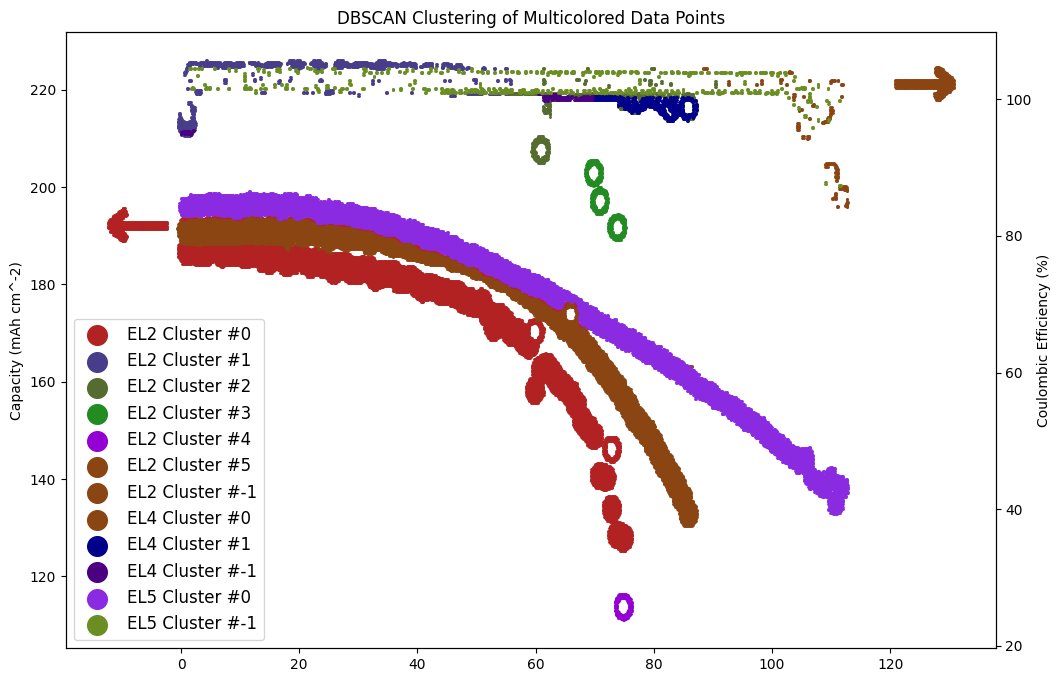

```json
{
  "clusters": [
    {
      "title": "EL2 Cluster #0",
      "axis": "left",
      "axis_title": "Capacity (mAh cm^-2)"
    },
    {
      "title": "EL4 Cluster #0",
      "axis": "left",
      "axis_title": "Capacity (mAh cm^-2)"
    },
    {
      "title": "EL5 Cluster #0",
      "axis": "right",
      "axis_title": "Coulombic Efficiency (%)"
    }
  ]
}
```
{'clusters': [{'title': 'EL2 Cluster #0', 'axis': 'left', 'axis_title': 'Capacity (mAh cm^-2)'}, {'title': 'EL4 Cluster #0', 'axis': 'left', 'axis_title': 'Capacity (mAh cm^-2)'}, {'title': 'EL5 Cluster #0', 'axis': 'right', 'axis_title': 'Coulombic Efficiency (%)'}]}
CLUSTERED
{'EL2 Cluster #0': 'left', 'EL4 Cluster #0': 'left', 'EL5 Cluster #0': 'right'}
here
here
[0 0 0 ... 5 5 5]
Color grey
Label EL2 Cluster #0
Marker o
Color grey
Label EL2 Cluster #1
Marker o
Color grey
Label EL2 Cluster #2
Marker o
Color grey
Label EL2 Cluster #3
Marker o
Color grey
Label EL2 Cluster #4
Marker o
Color grey
Label EL2 Cluster #5
Mar

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


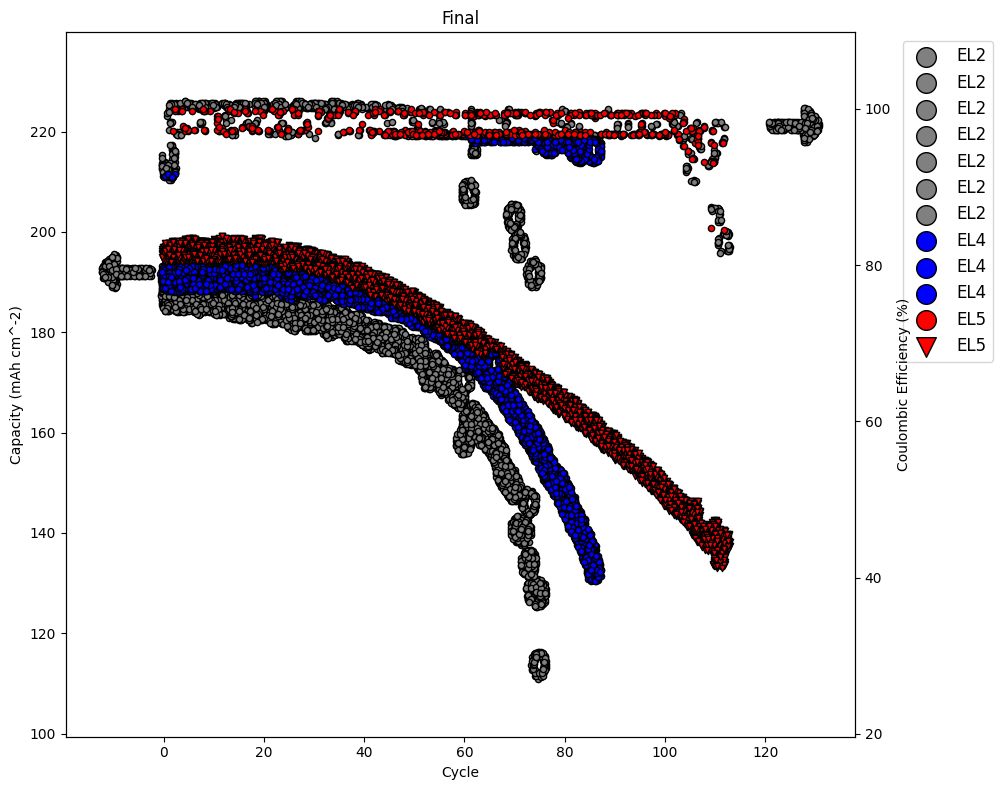

In [11]:
for image_num in [25]:
    run_pipeline(image_num, min_samples, predictor, model)